# Data Exploration

In [1]:
import nltk
import pandas as pd

## Read the datasets

In [3]:
kebersihan_positive = pd.read_csv('datasets/kebersihan-positive.csv')
kebersihan_negative = pd.read_csv('datasets/kebersihan-negative.csv')

service_positive = pd.read_csv('datasets/service-positive.csv')
service_negative = pd.read_csv('datasets/service-negative.csv')

linen_positive = pd.read_csv('datasets/linen-positive.csv')
linen_negative = pd.read_csv('datasets/linen-negative.csv')


# Combine dataframes
kebersihan_combined = pd.concat([kebersihan_positive, kebersihan_negative])
service_combined = pd.concat([service_positive, service_negative])
linen_combined = pd.concat([linen_positive, linen_negative])

# aspect labeling
kebersihan_combined['aspek'] = 'kebersihan'
service_combined['aspek'] =  'service'
linen_combined['aspek'] =  'linen'

# Combine all dataframes
all_data = pd.concat([kebersihan_combined, service_combined, linen_combined])

all_data = all_data.drop("Gabungan", axis=1)

all_data.head()

,review,kebersihan,linen,service,aspek
0,Tempat nyaman bersih tapi tv terlalu tinggi ti...,pos,neut,neut,kebersihan
1,"hotelnya bersih dan nyaman, tp keyika masuk ka...",pos,neut,neut,kebersihan
2,"Bersih,nyaman & asri. Cuma syg prnh airnya mat...",pos,neut,neut,kebersihan
3,"Kamar bersih dan nyaman, sarapan minimalis, cu...",pos,neut,neut,kebersihan
4,bersih tempatnya. saya suka. cuma air panasnya...,pos,neut,neut,kebersihan


In [4]:
# save combined dataset as new csv file
all_data.to_csv('datasets/hotel-review.csv', index=False)

## data visualization

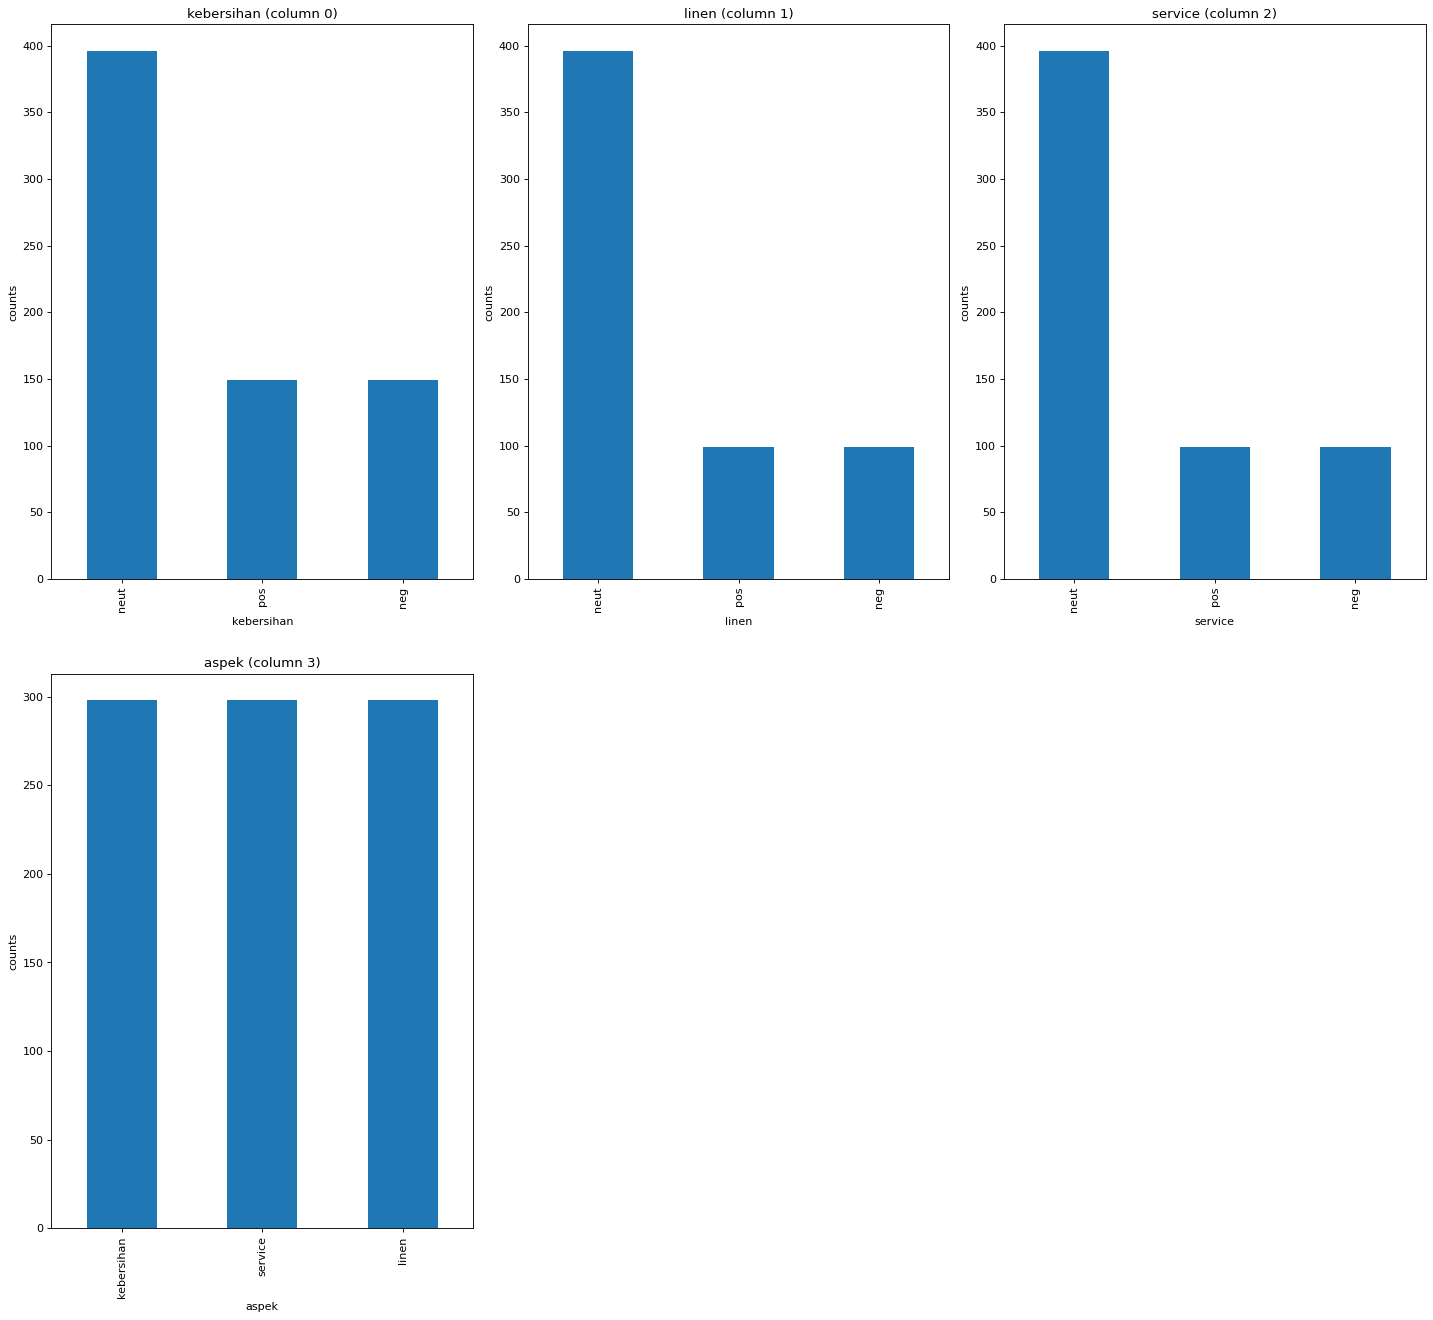

In [5]:
import matplotlib.pyplot as plt 
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(all_data, 10, 3)

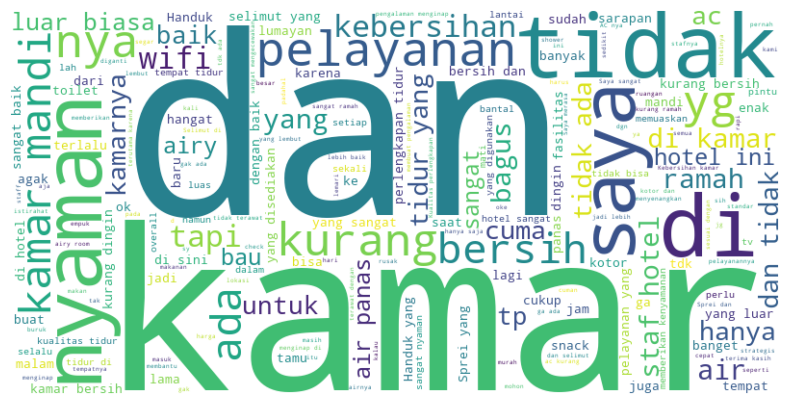

In [6]:
from wordcloud import WordCloud

# Assuming 'text_column' is the column containing text data in your dataframe
text_data = " ".join(all_data['review'])

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Preprocessing

In [277]:
df = pd.read_csv('datasets/hotel-review.csv')
df.head(10)

,review,kebersihan,linen,service,aspek
0,Tempat nyaman bersih tapi tv terlalu tinggi ti...,pos,neut,neut,kebersihan
1,"hotelnya bersih dan nyaman, tp keyika masuk ka...",pos,neut,neut,kebersihan
2,"Bersih,nyaman & asri. Cuma syg prnh airnya mat...",pos,neut,neut,kebersihan
3,"Kamar bersih dan nyaman, sarapan minimalis, cu...",pos,neut,neut,kebersihan
4,bersih tempatnya. saya suka. cuma air panasnya...,pos,neut,neut,kebersihan
5,"Bersih, nyaman, tapi WiFi lola banget",pos,neut,neut,kebersihan
6,"Kamar bagus,rapi,bersih dan wangi tapi sayang ...",pos,neut,neut,kebersihan
7,"bersih, kamar yg nyaman to kurang 1 yaitu WiFi...",pos,neut,neut,kebersihan
8,kamar bersih namun air panas tidak teesedia,pos,neut,neut,kebersihan
9,"haha..keliatan kolam renang besar,gk tau buat ...",pos,neut,neut,kebersihan


In [7]:
# Tokenizing
nltk.download('punkt')
# Stopwords removal
nltk.download('stopwords')
# Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

print('Completed')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wayan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wayan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wayan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Completed


## Cleaning

In [279]:
import re
import string

def cleaning(text):
    # Case folding
    text = text.lower()
    # Trim text
    text = text.strip()
    # Remove punctuations, special characters, and double whitespace
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\\s+', ' ', text)  # Corrected line
    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # Remove number and whitespaces
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    return text

df['review'] = df['review'].apply(lambda x: cleaning(x))
df.head()


,review,kebersihan,linen,service,aspek
0,tempat nyaman bersih tapi tv terlalu tinggi ti...,pos,neut,neut,kebersihan
1,hotelnya bersih dan nyaman tp keyika masuk kam...,pos,neut,neut,kebersihan
2,bersih nyaman asri cuma syg prnh airnya mati s...,pos,neut,neut,kebersihan
3,kamar bersih dan nyaman sarapan minimalis cuma...,pos,neut,neut,kebersihan
4,bersih tempatnya saya suka cuma air panasnya l...,pos,neut,neut,kebersihan


## tokenization

In [280]:
from nltk.tokenize import word_tokenize

df['review'] = df['review'].apply(lambda x: word_tokenize(x))
df.head()

,review,kebersihan,linen,service,aspek
0,"[tempat, nyaman, bersih, tapi, tv, terlalu, ti...",pos,neut,neut,kebersihan
1,"[hotelnya, bersih, dan, nyaman, tp, keyika, ma...",pos,neut,neut,kebersihan
2,"[bersih, nyaman, asri, cuma, syg, prnh, airnya...",pos,neut,neut,kebersihan
3,"[kamar, bersih, dan, nyaman, sarapan, minimali...",pos,neut,neut,kebersihan
4,"[bersih, tempatnya, saya, suka, cuma, air, pan...",pos,neut,neut,kebersihan


## Word Normalization

In [8]:
# get slang word data from github
indo_slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")
indo_slang_word.head()

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0


In [282]:
def replace_slang_word(doc,slang_word):
    for index in range(0,len(doc)-1):
        index_slang = slang_word.slang==doc[index]
        formal = list(set(slang_word[index_slang].formal))
        if len(formal)==1:
            doc[index]=formal[0]
    return doc

df["review"] = df["review"].apply(lambda x: replace_slang_word(x, indo_slang_word))
df.head()

,review,kebersihan,linen,service,aspek
0,"[tempat, nyaman, bersih, tapi, tv, terlalu, ti...",pos,neut,neut,kebersihan
1,"[hotelnya, bersih, dan, nyaman, tapi, keyika, ...",pos,neut,neut,kebersihan
2,"[bersih, nyaman, asri, cuma, sayang, pernah, a...",pos,neut,neut,kebersihan
3,"[kamar, bersih, dan, nyaman, sarapan, minimali...",pos,neut,neut,kebersihan
4,"[bersih, tempatnya, saya, suka, cuma, air, pan...",pos,neut,neut,kebersihan


## Stopwords Removal

In [283]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

filtering = stopwords.words('indonesian')
# words_to_remove = ['kurang', 'agak', 'tidak']
# for word in words_to_remove:
#     if word in filtering:
#         filtering.remove(word)

def stopword_removal(review):

    x = []
    data = []
    def myFunc(x):
      if x in filtering:
        return False
      else:
        return True

    fit = filter(myFunc, review)
    for x in fit:
      data.append(x)

    return data

df['review'] = df['review'].apply(stopword_removal)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,kebersihan,linen,service,aspek
0,"[nyaman, bersih, tv, lihat]",pos,neut,neut,kebersihan
1,"[hotelnya, bersih, nyaman, keyika, masuk, kama...",pos,neut,neut,kebersihan
2,"[bersih, nyaman, asri, sayang, airnya, mati, l...",pos,neut,neut,kebersihan
3,"[kamar, bersih, nyaman, sarapan, minimalis, me...",pos,neut,neut,kebersihan
4,"[bersih, tempatnya, suka, air, panasnya, macet...",pos,neut,neut,kebersihan


## Stemming

In [284]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Menerapkan stemming pada setiap kata dalam daftar tokens
tqdm.pandas(desc="Proses Stemming")
df['review'] = df['review'].progress_apply(lambda x: [stemmer.stem(word) for word in x])

# combine tokens into string
df["review"] = df["review"].apply(' '.join)

# Menampilkan hasil
df.head()

Proses Stemming: 100%|██████████| 894/894 [00:35<00:00, 25.49it/s] 


,review,kebersihan,linen,service,aspek
0,nyaman bersih tv lihat,pos,neut,neut,kebersihan
1,hotel bersih nyaman keyika masuk kamar bau bek...,pos,neut,neut,kebersihan
2,bersih nyaman asri sayang air mati lokasi bkn ...,pos,neut,neut,kebersihan
3,kamar bersih nyaman sarap minimal menu air pan...,pos,neut,neut,kebersihan
4,bersih tempat suka air panas macet kmrn,pos,neut,neut,kebersihan


In [285]:
# save to new csv file
df.to_csv('datasets/clean_dataset.csv', index=False)

## WorldCloud

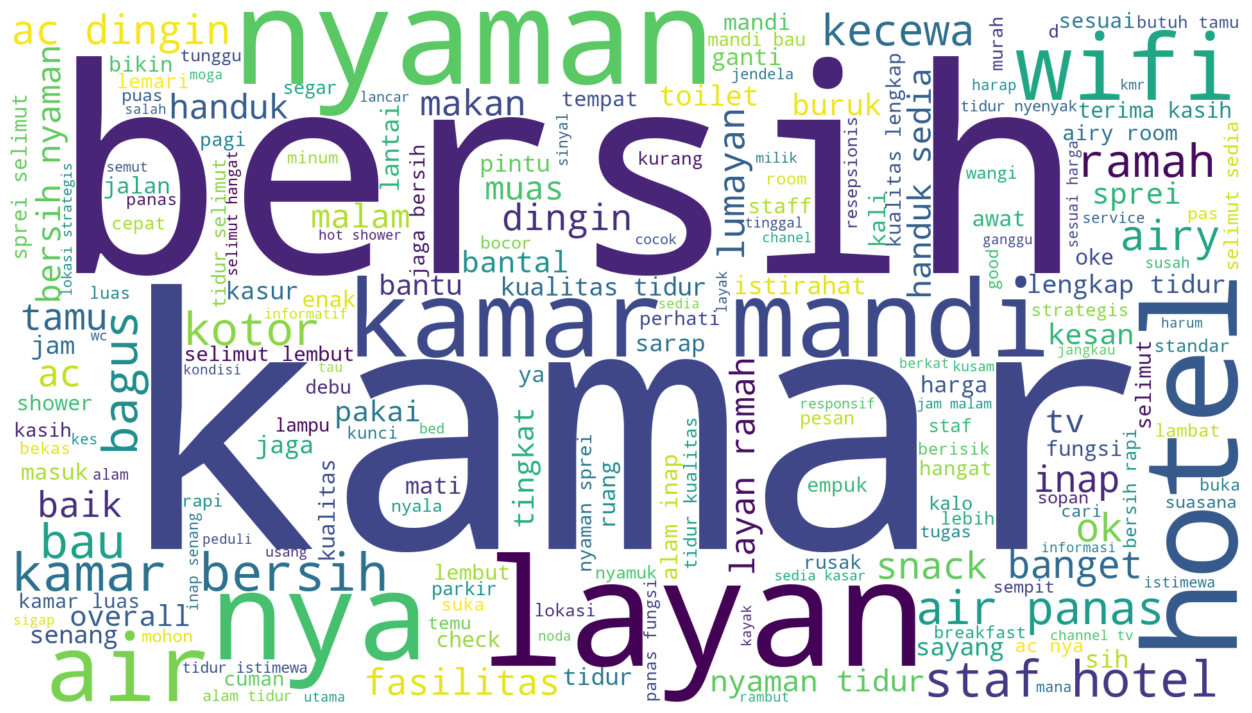

In [286]:
text_data = " ".join(df['review'])

wordcloud = WordCloud(width=1920, height=1080, max_words=200, background_color='white').generate(text_data)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<strong>Nb:</strong>
<br/>
Disini masih ada beberapa kata yang tidak terlalu bermakna seperti { nya, ya, sih, pas, kali, d, dsb} sehingga perlu penyesuai di bagian stopword removal.

# TF-IDF 

In [10]:
df_clean = pd.read_csv('datasets/clean_dataset.csv')
df_clean.head()

,review,kebersihan,linen,service,aspek
0,nyaman bersih tv lihat,pos,neut,neut,kebersihan
1,hotel bersih nyaman keyika masuk kamar bau bek...,pos,neut,neut,kebersihan
2,bersih nyaman asri sayang air mati lokasi bkn ...,pos,neut,neut,kebersihan
3,kamar bersih nyaman sarap minimal menu air pan...,pos,neut,neut,kebersihan
4,bersih tempat suka air panas macet kmrn,pos,neut,neut,kebersihan


## Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

# Pembagian data
df_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=42)

# Display the shapes of the resulting DataFrames
print(df_train.shape)
print(df_test.shape)

(715, 5)
(179, 5)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df_train["review"])
X_test_tfidf = vectorizer.transform(df_test["review"])

# Menampilkan hasil
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(715, 1151)
(179, 1151)


# K-means Clustering

In [15]:
from sklearn.cluster import KMeans

# Pelatihan model K-Means
num_k = 3
kmeans = KMeans(n_clusters=num_k, random_state=42, init='k-means++', n_init=10)
clusters = kmeans.fit_predict(X_train_tfidf)

# Tambahkan kolom kluster ke dataframe
df_train['cluster'] = kmeans.labels_

# Tampilkan hasil klustering
df_train.head()

,review,kebersihan,linen,service,aspek,cluster
331,ruang kes sempit airy kamar lantai jendela hot...,neut,neut,pos,service,0
735,selimut sedia lembut kualitas tidur istimewa,NaN,NaN,NaN,linen,1
382,resepsionis ramah informasi ramah,neut,neut,pos,service,2
706,handuk sedia segar wangi senang,NaN,NaN,NaN,linen,0
815,fasilitas snack minum,neut,neg,neut,linen,0


In [16]:
# Analisis hasil klustering
# Anda dapat mengeksplorasi dan menganalisis hasil klustering untuk setiap kluster

# Misalnya, menampilkan beberapa contoh teks di setiap kluster
for i in range(num_k):
    cluster_samples = df_train[df_train['cluster'] == i]['review'].sample(5).values
    print(f'\nContoh teks di kluster {i+1}:\n')
    for sample in cluster_samples:
        print(f'- {sample}')


Contoh teks di kluster 1:

- bersih tempat suka air panas macet kmrn
- ac nya panas dingin bersih
- layan air panas
- inap pakai jamin ktp uang ribu jaga cerewet kamar ketok
- kecewa nya susah d cari kamar mandi pengap bau ac dingin tetes milik nya amat sopan cocok milik inap kayak rem pasar kemarin kamar tangg

Contoh teks di kluster 2:

- sprei selimut sedia alam tidur istimewa
- tidur nyenyak selimut hangat
- kualitas lengkap tidur kecewa sesuai harga bayar
- selimut kamar mewah nyaman tidur kualitas
- lengkap tidur hotel rumah nyaman

Contoh teks di kluster 3:

- kualitas layan staf baik
- layan resepsionis ramah bantu proses check check out
- staf hotel sigap tanggap minta tamu
- kecewa layan nya buruk security staff hotel receptionistnya ramah pesan makan banget mesti telpon kali mohon tingkat bidang layan
- layan layan cepat tanggap


In [17]:
from sklearn.metrics import silhouette_score

# Dapatkan label dari data pelatihan
labels = kmeans.labels_

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X_train_tfidf, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.02936956222762586


In [18]:
# Get the centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [20]:
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality to 2D using TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train_tfidf)

# Apply K-means clustering on reduced data
clusters = kmeans.fit_predict(X_svd)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Text Data (TruncatedSVD)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

# Word2Vec


In [21]:
# Load dataset
df_word2vec = pd.read_csv('datasets/clean_dataset.csv')

# 'review' is the column containing text data
reviews = df_word2vec['review'].tolist()

# Tokenize the reviews (you might need to perform additional preprocessing based on your data)
tokenized_reviews = [review.split() for review in reviews]


In [22]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Extract word vectors
word_vectors = word2vec_model.wv

In [23]:
# Create a function to average word vectors for each review
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Create feature vectors for each review
feature_vectors = [average_word_vectors(review, word2vec_model, word_vectors.index_to_key, 100) for review in tokenized_reviews]


In [24]:
from sklearn.preprocessing import StandardScaler

# Standardize feature vectors
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(feature_vectors)


In [25]:
# Ensure non-negativity
scaled_feature_vectors[scaled_feature_vectors < 0] = 0

In [26]:
# Apply k-means clustering
k = 3
kmeans_word2vec = KMeans(n_clusters=k, random_state=42, n_init=3)
kmeans_word2vec.fit(scaled_feature_vectors)

# Add cluster labels to the dataframe
df_word2vec['cluster_label'] = kmeans_word2vec.labels_
df_word2vec.head()

,review,kebersihan,linen,service,aspek,cluster_label
0,nyaman bersih tv lihat,pos,neut,neut,kebersihan,2
1,hotel bersih nyaman keyika masuk kamar bau bek...,pos,neut,neut,kebersihan,2
2,bersih nyaman asri sayang air mati lokasi bkn ...,pos,neut,neut,kebersihan,2
3,kamar bersih nyaman sarap minimal menu air pan...,pos,neut,neut,kebersihan,0
4,bersih tempat suka air panas macet kmrn,pos,neut,neut,kebersihan,2


In [27]:
# Dapatkan label dari data pelatihan
labels_word2vec = kmeans_word2vec.labels_

# Hitung Silhouette Score
silhouette_avg_word2vec = silhouette_score(scaled_feature_vectors, labels_word2vec)
print(f"Silhouette Score: {silhouette_avg_word2vec}")

Silhouette Score: 0.3319578704931387


In [28]:
# Get the centroids and labels
centroids = kmeans_word2vec.cluster_centers_
labels = kmeans_word2vec.labels_

# Reduce dimensionality to 2D using TruncatedSVD
svd_word2vec = TruncatedSVD(n_components=2)
X_svd_word2vec = svd_word2vec.fit_transform(X_train_tfidf)

# Apply K-means clustering on reduced data
clusters_word2vec = kmeans_word2vec.fit_predict(X_svd_word2vec)

# Visualize the clusters_word2vec
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_svd_word2vec[:, 0], y=X_svd_word2vec[:, 1], hue=clusters_word2vec, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Text Data (TruncatedSVD)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

# Naive bayes for clustering

In [29]:
# readthe dataset

df_nb = pd.read_csv('datasets/clean_dataset.csv')
df_nb.head()

,review,kebersihan,linen,service,aspek
0,nyaman bersih tv lihat,pos,neut,neut,kebersihan
1,hotel bersih nyaman keyika masuk kamar bau bek...,pos,neut,neut,kebersihan
2,bersih nyaman asri sayang air mati lokasi bkn ...,pos,neut,neut,kebersihan
3,kamar bersih nyaman sarap minimal menu air pan...,pos,neut,neut,kebersihan
4,bersih tempat suka air panas macet kmrn,pos,neut,neut,kebersihan


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_nb['review'], df_nb['aspek'], test_size=0.2, random_state=42)

# Menampilkan hasil
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (715,)
X_test shape: (179,)
y_train shape: (715,)
y_test shape: (179,)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung TF-IDF pada kolom 'tweet_clean' di data latih
train_tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

# Menghitung TF-IDF pada kolom 'tweet_clean' di data latih
test_tfidf_matrix = tfidf_vectorizer.transform(X_test)

# Menampilkan hasil
print(train_tfidf_matrix.shape)
print(test_tfidf_matrix.shape)

(715, 1151)
(179, 1151)


In [34]:
y_train.value_counts()

aspek
linen         241
service       238
kebersihan    236
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(train_tfidf_matrix, y_train)
y_train_resampled.value_counts()

aspek
service       241
linen         241
kebersihan    241
Name: count, dtype: int64

In [36]:
y_test.value_counts()

aspek
kebersihan    62
service       60
linen         57
Name: count, dtype: int64

In [37]:
X_test_resampled, y_test_resampled = SMOTE(random_state=42).fit_resample(test_tfidf_matrix, y_test)
y_test_resampled.value_counts()

aspek
linen         62
service       62
kebersihan    62
Name: count, dtype: int64

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

y_pred = nb.predict(X_test_resampled)

print('Accuracy score : ', accuracy_score(y_test_resampled, y_pred))
print('Precision score : ', precision_score(y_test_resampled, y_pred, average='weighted'))
print('Recall score : ', recall_score(y_test_resampled, y_pred, average='weighted'))
print('F1 score : ', f1_score(y_test_resampled, y_pred, average='weighted'))

Accuracy score :  0.8494623655913979
Precision score :  0.854767875104481
Recall score :  0.8494623655913979
F1 score :  0.8503193114126382
